<a href="https://colab.research.google.com/github/nasirbashak/Plant-the-future/blob/master/Traffic_Data_Creation_using_1D_Perlin_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install tf-nightly-2.0-preview
!pip install tensorflow==2.1.0
!pip install noise


     |████████████████████████████████| 421.8MB 23kB/s 
     |████████████████████████████████| 3.9MB 34.3MB/s 
     |████████████████████████████████| 450kB 39.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=10cc59cfe4ea12ad4e3d99fd4c7ef1f4f7cc870b19425fb25d00a9317b8b0e13
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc

### Importing Packages

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import noise
import pandas as pd

print(tf.__version__)

2.1.0


### Helper function to plot data

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

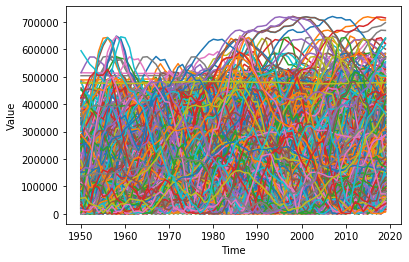

In [0]:
def createData(rows,startYear,endYear,plotGraph=True,printLog=True):

  points = 256
  span = 5.0
  octaves = 20
  base = 25
  slope = .005
  amplitude = 10000

  values = []
  n= 0


  while n != rows:
    if printLog:
      print("Row ",n+1)
    span = np.random.random_sample()*10

    time = []
    value = []

    for i in range(startYear,endYear+1):
      x = float(i) * span / points - 0.5 * span

      y = base + noise.pnoise1(x , octaves) * amplitude
      #print(x,y, end= '\n')
      time.append(int(i))
      value.append(int(np.abs(y)*100))
      base*=slope

    #print(len(value))
    if value[0] > value[-1]:
      if printLog:
        print("Rejected\n")
    else:
      if printLog:
        print("Accepted\n")
      n+=1
      if plotGraph:
        #plt.plot(time, value)
        plot_series(time,value)
        #print(time[0],time[-1])
        #print(value[0],value[-1])

      values.append(np.array(value))



  return np.array(values)

    
    #print(time)
    #print(value)

data = createData(1000,startYear=1950,endYear=2019,plotGraph=True,printLog=False)


In [0]:
data.shape

(1000, 70)

In [0]:
years = list(range(1950,2020))
years = list(map(str,years))
years[:20]

['1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969']

In [0]:
 d= pd.DataFrame(data,columns = years)
 d.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,150403,182655,208904,239936,259450,278091,299020,297100,286809,246121,205695,191284,176929,168412,150050,129941,96688,67916,56928,52585,58217,50858,59579,49217,28646,32376,52123,53698,55264,53876,52620,42978,33503,14361,41981,44583,41128,33388,37143,49098,62262,89940,129862,158811,193117,206279,195761,193889,197014,178351,177136,172524,175826,177172,187702,197876,188720,184930,176246,167307,184657,212086,249144,285684,299955,307400,281048,306884,285234,249815
1,76958,34511,10175,17840,3110,4809,22907,3940,28213,106054,188835,243715,265645,330122,410408,457375,457198,439433,380340,365049,359963,305433,282811,357516,411813,419873,462643,464720,332320,206955,104804,20150,159063,278800,377236,431964,408282,347630,357313,311203,269980,235530,259209,349292,409317,454281,503172,447574,346372,318914,300665,304878,264449,128261,52602,33358,45334,25578,34104,25991,61489,51700,55235,100951,78233,116064,181613,107099,124659,184114
2,31735,49601,35689,1721,36185,76196,90421,96130,67988,32638,4656,43026,52682,20355,5778,27165,76165,118544,145881,147872,161806,154259,149530,177686,196856,218599,243521,210525,157432,79936,5411,25700,34799,5572,60942,7184,31806,33101,16397,26848,4690,1941,62087,46397,2727,54982,66273,65864,881,62222,61557,28507,13990,19309,32462,23265,20430,4653,18021,7525,6288,17255,1213,535,38775,104211,86714,48103,398,41483
3,21750,1660,3071,1471,7587,9653,21953,15856,16401,14954,54558,90118,143887,137989,149867,158105,149317,151354,162720,177621,213969,252876,289905,272266,310265,313622,335361,352662,367286,396994,398262,409545,428093,446762,469919,468878,518675,545625,534823,508839,499924,490188,477452,452229,426874,384093,327397,285222,256686,229930,182209,131581,121284,134772,133356,123365,130122,111925,102477,80822,44795,22914,12666,10953,51031,67753,97752,113275,149623,137284
4,115679,138678,179910,282093,364453,379865,376419,382417,353360,326951,300109,241991,227385,136653,115719,38861,4173,9202,334,19166,75399,125420,129184,111092,44933,19474,99334,138748,160886,193011,138202,79669,44427,14639,14044,34016,5421,24103,45724,12400,36931,41936,8359,79861,102983,77201,97860,49274,76773,127261,130839,132539,140077,109508,40169,152676,183945,170523,155457,114129,68549,27033,30036,71258,131684,174191,232516,275704,326658,376725


In [0]:
d.to_csv("TrafficDensity1950to2019.csv")

In [0]:
d.describe()


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,93816.827000,97444.770000,101803.490000,107464.027000,113701.402000,119658.943000,124090.359000,127898.429000,130136.104000,131404.570000,132375.171000,133877.293000,134629.539000,136844.961000,139500.651000,142591.000000,145393.297000,146558.591000,148195.397000,149436.296000,151069.708000,151290.655000,151573.081000,150678.633000,150742.468000,150720.432000,152826.092000,152828.573000,150449.845000,149549.360000,149378.713000,149890.9890,151130.981000,154287.147000,157716.678000,160108.616000,163677.436000,167257.773000,170533.831000,170566.499000,170319.082000,169663.08000,168786.217000,169122.76600,170008.56900,171701.606000,173057.913000,172894.387000,173112.059000,173248.208000,173363.069000,173406.691000,173244.782000,173754.329000,175324.75400,177885.798000,180160.22000,183345.927000,185736.780000,187601.653000,189761.109000,193678.061000,197460.606000,200082.29800,204159.60000,208803.460000,212369.374000,217430.00400,223319.472000,226963.796000
std,102142.004021,102388.957204,106351.130359,111135.752941,115525.900353,120188.753441,124175.305922,127259.796744,127209.477907,126762.392856,127112.719575,125878.903357,126652.191474,126312.344799,126697.060397,127616.882965,128612.731427,129464.573098,129327.196085,129173.618647,127851.196246,126828.309326,128001.505959,128725.353895,129343.638102,132301.378934,134745.570103,135308.286843,134991.247453,134900.337887,136350.451368,137859.2556,140815.249594,142826.442675,145830.003315,148485.004426,150052.164146,150137.035623,150668.245857,149875.450363,148190.607553,146461.19241,146585.030045,146517.59074,147520.48765,148009.881983,149132.959176,150862.207687,151290.407185,150263.510163,149745.135536,148572.722707,149500.071572,150441.597637,152205.66386,153614.089685,153743.46359,154393.906033,155358.485486,155741.386354,155400.529583,154315.305312,152813.769813,151852.98705,150360.37927,149018.786954,148343.949678,147446.11074,146173.615799,143733.395338
min,190.000000,68.000000,111.000000,437.000000,315.000000,77.000000,26.000000,20.000000,99.000000,96.000000,70.000000,69.000000,390.000000,38.000000,275.000000,177.000000,101.000000,78.000000,159.000000,213.000000,169.000000,320.000000,5.000000,25.000000,343.000000,283.000000,311.000000,53.000000,36.000000,385.000000,40.000000,18.0000,190.000000,124.000000,49.000000,0.000000,71.000000,385.000000,422.000000,223.000000,160.000000,59.00000,21.000000,48.00000,287.00000,159.000000,198.000000,289.000000,66.000000,500.000000,30.000000,39.000000,62.000000,263.000000,77.00000,25.000000,79.00000,163.000000,3.000000,65.000000,124.000000,1261.000000,452.000000,293.00000,283.00000,359.000000,288.000000,698.00000,353.000000,7711.000000
25%,23206.500000,25967.250000,27526.500000,27961.750000,27386.000000,30708.000000,32545.000000,31549.750000,35102.500000,34847.250000,

In [0]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 70 columns):
1950    1000 non-null int64
1951    1000 non-null int64
1952    1000 non-null int64
1953    1000 non-null int64
1954    1000 non-null int64
1955    1000 non-null int64
1956    1000 non-null int64
1957    1000 non-null int64
1958    1000 non-null int64
1959    1000 non-null int64
1960    1000 non-null int64
1961    1000 non-null int64
1962    1000 non-null int64
1963    1000 non-null int64
1964    1000 non-null int64
1965    1000 non-null int64
1966    1000 non-null int64
1967    1000 non-null int64
1968    1000 non-null int64
1969    1000 non-null int64
1970    1000 non-null int64
1971    1000 non-null int64
1972    1000 non-null int64
1973    1000 non-null int64
1974    1000 non-null int64
1975    1000 non-null int64
1976    1000 non-null int64
1977    1000 non-null int64
1978    1000 non-null int64
1979    1000 non-null int64
1980    1000 non-null int64
1981    1000 non-null int6

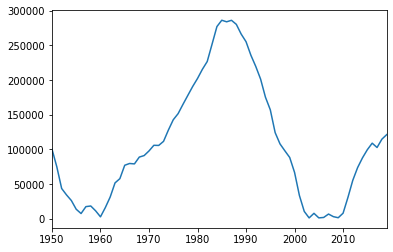

In [0]:
#Plotting random row
d.iloc[100].plot()

In [0]:
df = pd.concat([df,d], sort=False)

In [0]:
df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Area,City,Country,If 2020> capacity,Latitude,Longitude,existing road/flyover capacity,existing road/flyover construction year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90000.0,Yelahanka,Bengaluru,India,Yes,12.97194,77.59369,80000.0,2015.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120000.0,Hebbala,Bengaluru,India,No,12.97194,77.59369,150000.0,2018.0
0,17837.0,13787.0,9330.0,38816.0,38780.0,47698.0,29463.0,31825.0,38626.0,28461.0,20224.0,17124.0,32190.0,38804.0,11106.0,66037.0,123733.0,160603.0,157994.0,142760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,301833.0,359414.0,390816.0,347410.0,354993.0,308461.0,281350.0,231374.0,187100.0,113960.0,20097.0,152578.0,256431.0,335672.0,419113.0,427710.0,454462.0,514857.0,515442.0,510394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40235.0,128925.0,225784.0,231592.0,144269.0,78111.0,846.0,68789.0,73796.0,15141.0,86976.0,137098.0,107946.0,133648.0,208689.0,241591.0,194813.0,151907.0,46693.0,55313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,294036.0,290001.0,301151.0,273888.0,256100.0,295592.0,318038.0,316093.0,318313.0,320637.0,329207.0,320229.0,245803.0,208867.0,106914.0,35072.0,72876.0,159768.0,237807.0,321077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33797.0,34759.0,36360.0,38856.0,40906.0,43035.0,43650.0,46466.0,47951.0,50191.0,51501.0,53614.0,53159.0,53837.0,54148.0,55447.0,55541.0,56235.0,56693.0,58672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,17837.0,13787.0,9330.0,38816.0,38780.0,47698.0,29463.0,31825.0,38626.0,28461.0,20224.0,17124.0,32190.0,38804.0,11106.0,66037.0,123733.0,160603.0,157994.0,142760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,301833.0,359414.0,390816.0,347410.0,354993.0,308461.0,281350.0,231374.0,187100.0,113960.0,20097.0,152578.0,256431.0,335672.0,419113.0,427710.0,454462.0,514857.0,515442.0,510394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40235.0,128925.0,225784.0,231592.0,144269.0,78111.0,846.0,68789.0,73796.0,15141.0,86976.0,137098.0,107946.0,133648.0,208689.0,241591.0,194813.0,151907.0,46693.0,55313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.to_csv("SampleTrafficData.csv")

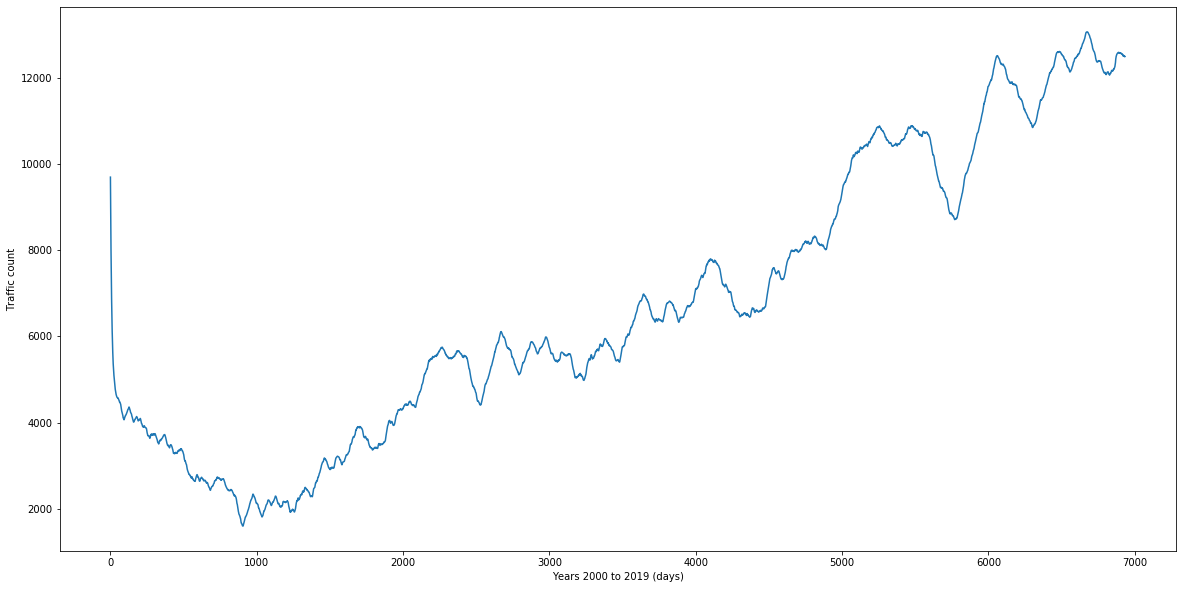

In [0]:
def createData(rows,startYear,endYear,plotGraph=True,printLog=True):

  points = 2560
  span = 5.0
  octaves = 20
  base = 5000
  slope = .9
  amplitude = 10000

  values = []
  n= 0


 
  span = np.random.random_sample()*10

  time = []
  value = []

  #years = [x for x in range((endYear-startYear)*365)]


  for i in range((endYear-startYear)*365):
    #for j in range(365):
    x = float(startYear+i) * span / points - 0.5 * span

    y = base + noise.pnoise1(x , octaves) * amplitude
    #print(x,y, end= '\n')
    
    time.append(n)
    n+=1
    #span*=1.2
    base*=slope
    y = y + (i*2*slope)
    value.append(int(y))


    #base*=slope
  plt.figure(figsize=(20,10))
  plt.plot(time,value)
  plt.xlabel("Years 2000 to 2019 (days)")
  plt.ylabel("Traffic count")

  minValue = min(value)
  value = np.array(value)+np.abs(minValue) + np.random.randint(50)

 

  return  np.array(value), np.array(time)



data ,time = createData(1000,startYear=2000,endYear=2019,plotGraph=True,printLog=True)


Text(0, 0.5, 'Traffic count')

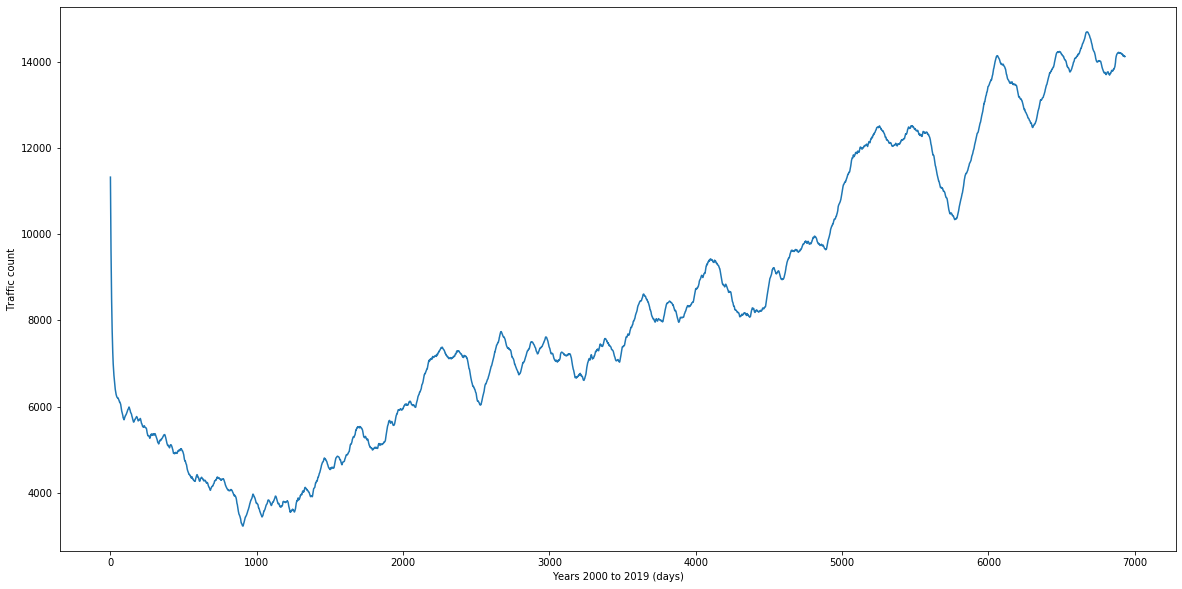

In [0]:
plt.figure(figsize=(20,10))
plt.plot(time,data)
plt.xlabel("Years 2000 to 2019 (days)")
plt.ylabel("Traffic count")

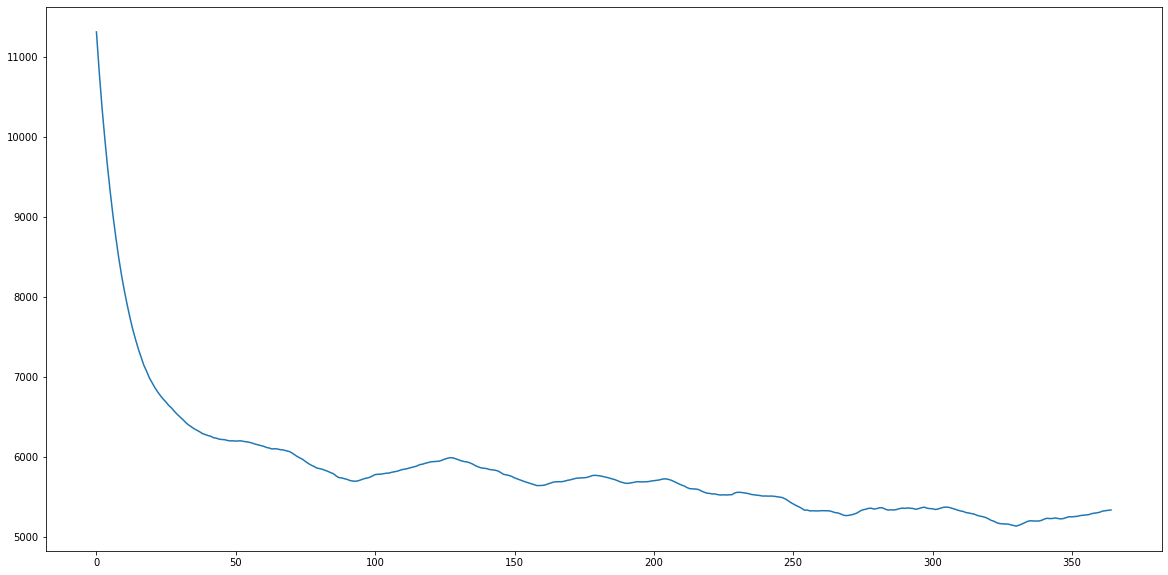

In [0]:
plt.figure(figsize=(20,10))
plt.plot(time[:365],data[:365])

In [0]:
min(data)

3227

In [0]:
max(data)

14688

Total Days =  9497


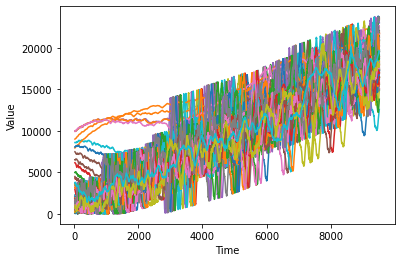

In [18]:
def isLeap(year):
  return ((year%4 ==0 and year%100 !=0) or (year%400 == 0))






def createData(rows,startYear,endYear,plotGraph=True,printLog=True):

  points = 2560
  span = 5.0
  octaves = 20
  base = 5000
  slope = .9
  amplitude = 10000

  values = []
  n= 0

  totalDays = 0
  startAdjust = 20

  for year in range(startYear,endYear+1):
    if isLeap(year):
      totalDays+=366
    else:
      totalDays+=365

  print("Total Days = ",totalDays)
  totalDays+=startAdjust

  


  while n != rows:
 
    span = np.random.random_sample()*10

    time = []
    value = []

    for i in range(totalDays):
      x = float(startYear+i) * span / points - 0.5 * span

      y = base + noise.pnoise1(x , octaves) * amplitude
      
      time.append(i)
      base*=slope
      y = y + (i*2*slope)
      value.append(int(y))


    minValue = min(value)
    value = np.array(value)+np.abs(minValue) + np.random.randint(50)
    value = np.array(value[startAdjust:])
    time = np.array(time[startAdjust:])

    n+=1

    if plotGraph:
      #plt.figure(figsize=(20,10))
      plot_series(time,value)
      #plt.xlabel("Years 2000 to 2019 (days)")
      #plt.ylabel("Traffic count")
    values.append(value)

    



 

  return  np.array(values), np.array(time)



data ,time = createData(100,startYear=2000,endYear=2025,plotGraph=True,printLog=True)


In [19]:
print(data.shape)
print(time.shape)

(100, 9497)
(9497,)


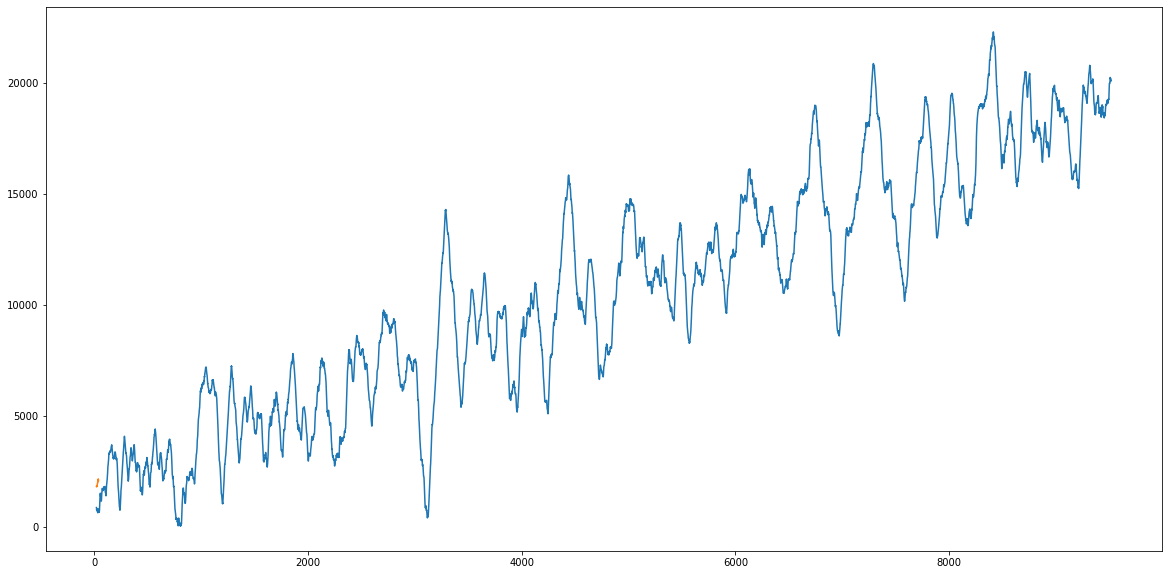

In [20]:
plt.figure(figsize=(20,10))
plt.plot(time,data[9])
plt.plot(time[:20],data[0][:20])

In [23]:
data[0][9496]

19751

In [24]:
columns = []

for year in range(2000,2025+1):
  if isLeap(year):
    for day in range(1,367):
      clm = str(year) +'-'+ str(day)
      columns.append(clm)
  else:
    for day in range(1,366):
      clm = str(year) +'-'+ str(day)
      columns.append(clm)

print(columns)



['2000-1', '2000-2', '2000-3', '2000-4', '2000-5', '2000-6', '2000-7', '2000-8', '2000-9', '2000-10', '2000-11', '2000-12', '2000-13', '2000-14', '2000-15', '2000-16', '2000-17', '2000-18', '2000-19', '2000-20', '2000-21', '2000-22', '2000-23', '2000-24', '2000-25', '2000-26', '2000-27', '2000-28', '2000-29', '2000-30', '2000-31', '2000-32', '2000-33', '2000-34', '2000-35', '2000-36', '2000-37', '2000-38', '2000-39', '2000-40', '2000-41', '2000-42', '2000-43', '2000-44', '2000-45', '2000-46', '2000-47', '2000-48', '2000-49', '2000-50', '2000-51', '2000-52', '2000-53', '2000-54', '2000-55', '2000-56', '2000-57', '2000-58', '2000-59', '2000-60', '2000-61', '2000-62', '2000-63', '2000-64', '2000-65', '2000-66', '2000-67', '2000-68', '2000-69', '2000-70', '2000-71', '2000-72', '2000-73', '2000-74', '2000-75', '2000-76', '2000-77', '2000-78', '2000-79', '2000-80', '2000-81', '2000-82', '2000-83', '2000-84', '2000-85', '2000-86', '2000-87', '2000-88', '2000-89', '2000-90', '2000-91', '2000-9

In [25]:
len(columns)

9497

In [26]:
df = pd.DataFrame(data,columns=columns)
df.head()

,2000-1,2000-2,2000-3,2000-4,2000-5,2000-6,2000-7,2000-8,2000-9,2000-10,2000-11,2000-12,2000-13,2000-14,2000-15,2000-16,2000-17,2000-18,2000-19,2000-20,2000-21,2000-22,2000-23,2000-24,2000-25,2000-26,2000-27,2000-28,2000-29,2000-30,2000-31,2000-32,2000-33,2000-34,2000-35,2000-36,2000-37,2000-38,2000-39,2000-40,...,2025-326,2025-327,2025-328,2025-329,2025-330,2025-331,2025-332,2025-333,2025-334,2025-335,2025-336,2025-337,2025-338,2025-339,2025-340,2025-341,2025-342,2025-343,2025-344,2025-345,2025-346,2025-347,2025-348,2025-349,2025-350,2025-351,2025-352,2025-353,2025-354,2025-355,2025-356,2025-357,2025-358,2025-359,2025-360,2025-361,2025-362,2025-363,2025-364,2025-365
0,1835,1838,1849,1814,1835,1837,1863,1910,1917,1953,1974,1997,2006,2003,2031,2087,2140,2172,2149,2098,2030,1994,1976,1930,1873,1782,1723,1677,1655,1639,1608,1587,1564,1492,1400,1371,1342,1292,1205,1159,...,18104,18120,18121,18119,18119,18130,18143,18178,18187,18204,18237,18268,18250,18274,18321,18372,18404,18485,18552,18600,18651,18700,18698,18787,18904,18960,18985,19087,19149,19205,19263,19314,19345,19428,19500,19544,19600,19681,19756,19751
1,1563,1482,1429,1455,1470,1397,1285,1251,1238,1250,1321,1443,1565,1636,1662,1734,1801,1793,1782,1759,1783,1757,1756,1695,1708,1741,1755,1803,1830,1854,1868,1835,1834,1813,1777,1765,1798,1868,1878,1883,...,23042,23091,23071,23073,23083,23109,23082,23000,23041,23126,23166,23128,23111,23218,23248,23302,23280,23333,23389,23386,23418,23441,23473,23535,23566,23646,23664,23677,23642,23680,23744,23701,23694,23652,23628,23628,23623,23627,23602,23594
2,642,619,696,790,773,731,671,708,691,660,648,658,653,664,685,671,691,791,939,1055,1192,1315,1364,1462,1507,1499,1417,1356,1360,1391,1345,1245,1168,1146,1148,1193,1282,1413,1514,1563,...,19788,19742,19635,19590,19508,19482,19402,19313,19246,19262,19307,19332,19374,19386,19289,19199,19179,19096,19061,19059,19127,19108,19065,19051,19047,18994,18843,18719,18703,18704,18665,18578,18567,18656,18688,18679,18591,18592,18566,18509
3,2030,1992,1956,1926,1898,1890,1848,1834,1841,1842,1826,1822,1818,1821,1842,1837,1845,1858,1876,1898,1940,1926,1934,1923,1907,1875,1858,1832,1821,1769,1756,1732,1750,1754,1738,1736,1710,1690,1641,1554,...,15711,15710,15672,15670,15647,15628,15596,15559,15506,15430,15388,15351,15307,15288,15294,15277,15289,15238,15211,15201,15218,15237,15250,15266,15276,15257,15238,15218,15238,15270,15260,15223,15206,15179,15148,15140,15120,15128,15123,15126
4,1799,1769,1766,1710,1726,1748,1775,1835,1852,1886,1884,1830,1863,1791,1795,1784,1843,1891,1912,1885,1828,1732,1693,1642,1648,1631,1616,1553,1496,1490,1589,1685,1761,1883,1953,2002,2058,2087,2134,2191,...,20340,20373,20429,20434,20481,20544,20616,20675,20790,20798,20817,20895,20963,21044,21109,21189,21235,21299,21237,21204,21183,21118,21220,21241,21275,21347,21389,21409,21416,21367,21303,21240,21296,21243,21219,21178,21141,21106,21019,20970


In [27]:
df.describe()

,2000-1,2000-2,2000-3,2000-4,2000-5,2000-6,2000-7,2000-8,2000-9,2000-10,2000-11,2000-12,2000-13,2000-14,2000-15,2000-16,2000-17,2000-18,2000-19,2000-20,2000-21,2000-22,2000-23,2000-24,2000-25,2000-26,2000-27,2000-28,2000-29,2000-30,2000-31,2000-32,2000-33,2000-34,2000-35,2000-36,2000-37,2000-38,2000-39,2000-40,...,2025-326,2025-327,2025-328,2025-329,2025-330,2025-331,2025-332,2025-333,2025-334,2025-335,2025-336,2025-337,2025-338,2025-339,2025-340,2025-341,2025-342,2025-343,2025-344,2025-345,2025-346,2025-347,2025-348,2025-349,2025-350,2025-351,2025-352,2025-353,2025-354,2025-355,2025-356,2025-357,2025-358,2025-359,2025-360,2025-361,2025-362,2025-363,2025-364,2025-365
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2225.930000,2218.820000,2215.250000,2212.060000,2209.690000,2210.100000,2208.240000,2207.530000,2203.600000,2202.900000,2202.62000,2202.870000,2206.870000,2205.590000,2207.670000,2206.870000,2205.770000,2204.140000,2205.050000,2200.990000,2196.070000,2188.870000,2184.810000,2175.500000,2169.500000,2163.110000,2157.030000,2156.390000,2154.590000,2158.14000,2162.360000,2169.950000,2172.210000,2174.210000,2173.450000,2179.08000,2183.980000,2186.250000,2187.220000,2185.780000,...,18560.730000,18559.680000,18559.030000,18557.760000,18555.920000,18551.610000,18545.680000,18539.470000,18533.58000,18532.41000,18533.310000,18531.230000,18526.610000,18525.16000,18524.500000,18525.390000,18524.700000,18526.350000,18521.640000,18520.480000,18522.85000,18524.430000,18521.350000,18525.160000,18528.440000,18531.660000,18529.360000,18532.070000,18540.920000,18548.310000,18552.990000,18553.220000,18557.57000,18557.410000,18558.430000,18557.710000,18557.430000,18560.720000,18564.700000,18568.820000
std,2299.590988,2300.476808,2301.106617,2300.997324,2299.346054,2296.916424,2296.639786,2296.672201,2298.260941,2298.005334,2297.27032,2296.055333,2293.131169,2292.102476,2290.228281,2289.192644,2289.372777,2290.556357,2290.593846,2292.109321,2294.875993,2297.750154,2300.319476,2304.019783,2306.071536,2307.598274,2309.925581,2309.191467,2309.400631,2307.84725,2305.681939,2302.095016,2300.435524,2300.191407,2300.516527,2298.45729,2297.569278,2296.851224,2295.713782,2294.450893,...,2498.072157,2495.501913,2487.010275,2481.262574,2476.991951,2472.280781,2472.718031,2472.166798,2474.67188,2474.71655,2474.491996,2469.450231,2463.542866,2464.57962,2460.218806,2460.376513,2461.042185,2462.946238,2466.473619,2464.617496,2459.76646,2457.202089,2451.834503,2452.311001,2449.934195,2439.617134,2429.899281,2419.125776,2410.370074,2400.689639,2394.811688,2383.297006,2376.46952,2365.909965,2355.224925,2348.257941,2343.270309,2334.573506,2329.536315,2322.915133
min,107.000000,92.000000,91.000000,55.000000,44.000000,63.000000,97.000000,142.000000,183.000000,212.000000,244.00000,278.000000,286.000000,292.000000,307.000000,291.000000,306.000000,288.000000,227.000000,184.000000,152.000000,113.000000,65.000000,74.000000,68.000000,75.000000,79.000000,100.000000,101.000000,110.00000,95.000000,81.000000,70.000000,38.000000,40.000000,65.00000,96.000000,144.000000,203.000000,242.000000,...,10944.000000,11016.000000,11063.000000,11122.000000,11

In [28]:
df[["2000-1","2019-365"]]

,2000-1,2019-365
0,1835,13331
1,1563,16724
2,642,15336
3,2030,14105
4,1799,14441
...,...,...
95,535,13787
96,1445,16668
97,1428,16873
98,710,8222


In [29]:
df[["2020-1","2025-365"]]

,2020-1,2025-365
0,13383,19751
1,16782,23594
2,15339,18509
3,14144,15126
4,14459,20970
...,...,...
95,13711,17990
96,16698,18129
97,16917,23330
98,8185,18046


In [0]:
df.to_csv("Traffic_density_day_by_day_2000_to_2019.csv",index=False)

In [31]:
print(data.shape)
print(data.T.shape)


(100, 9497)
(9497, 100)


In [32]:
df2 = pd.DataFrame(data.T)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1835,1563,642,2030,1799,6509,3294,1950,1376,879,1960,1006,1873,3473,1605,1053,1528,1924,872,2020,967,1904,246,1276,9965,7478,1354,1560,1617,265,107,9006,704,664,1591,833,1335,623,2054,8588,...,1563,9950,1721,4336,693,556,2025,1288,1823,319,8045,288,1474,6166,1670,2106,9929,937,420,2273,710,3149,1032,2930,1236,4500,2013,1059,794,1656,2077,1469,1220,1834,1397,535,1445,1428,710,3733
1,1838,1482,619,1992,1769,6499,3266,1927,1400,857,2004,960,1821,3459,1567,1086,1559,1893,840,2030,976,1908,247,1343,9967,7478,1263,1488,1563,274,92,9009,729,645,1652,757,1381,573,2057,8587,...,1642,9952,1776,4308,707,631,1989,1392,1804,309,8039,339,1502,6155,1673,2106,9934,949,419,2243,713,3120,1035,2909,1224,4490,2018,1061,830,1622,2085,1487,1121,1825,1425,511,1342,1431,723,3731
2,1849,1429,696,1956,1766,6498,3250,1907,1433,764,1953,936,1809,3442,1533,1129,1588,1887,785,2139,1014,1958,253,1344,9968,7481,1235,1408,1458,298,91,9014,732,622,1652,737,1415,543,2046,8590,...,1673,9957,1792,4286,713,705,1960,1517,1803,321,8032,335,1535,6146,1690,2087,9948,965,422,2186,746,3110,1049,2880,1234,4483,2003,1064,816,1600,2099,1563,1038,1791,1430,500,1266,1460,758,3734
3,1814,1455,790,1926,1710,6490,3230,1869,1440,769,1936,866,1780,3450,1486,1174,1638,1833,715,2217,1054,2027,275,1386,9968,7477,1239,1410,1411,353,55,9017,693,604,1620,744,1418,563,2043,8590,...,1692,9956,1820,4260,679,735,1933,1613,1766,319,8033,317,1567,6136,1655,2060,9958,1009,425,2142,723,3125,1063,2838,1304,4475,2018,1066,825,1567,2096,1618,954,1834,1349,538,1177,1431,804,3748
4,1835,1470,773,1898,1726,6486,3197,1781,1504,783,1874,828,1810,3440,1451,1235,1662,1807,665,2235,1071,2012,305,1455,9966,7474,1281,1442,1371,361,44,9017,666,568,1559,732,1434,573,2038,8582,...,1713,9955,1854,4231,648,787,1924,1660,1738,321,8033,294,1598,6130,1633,2040,9970,1080,458,2108,750,3118,1088,2794,1428,4474,2024,1069,856,1528,2076,1667,925,1815,1246,523,1106,1329,832,3748


In [0]:
df2.index = columns

In [34]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
2000-1,1835,1563,642,2030,1799,6509,3294,1950,1376,879,1960,1006,1873,3473,1605,1053,1528,1924,872,2020,967,1904,246,1276,9965,7478,1354,1560,1617,265,107,9006,704,664,1591,833,1335,623,2054,8588,...,1563,9950,1721,4336,693,556,2025,1288,1823,319,8045,288,1474,6166,1670,2106,9929,937,420,2273,710,3149,1032,2930,1236,4500,2013,1059,794,1656,2077,1469,1220,1834,1397,535,1445,1428,710,3733
2000-2,1838,1482,619,1992,1769,6499,3266,1927,1400,857,2004,960,1821,3459,1567,1086,1559,1893,840,2030,976,1908,247,1343,9967,7478,1263,1488,1563,274,92,9009,729,645,1652,757,1381,573,2057,8587,...,1642,9952,1776,4308,707,631,1989,1392,1804,309,8039,339,1502,6155,1673,2106,9934,949,419,2243,713,3120,1035,2909,1224,4490,2018,1061,830,1622,2085,1487,1121,1825,1425,511,1342,1431,723,3731
2000-3,1849,1429,696,1956,1766,6498,3250,1907,1433,764,1953,936,1809,3442,1533,1129,1588,1887,785,2139,1014,1958,253,1344,9968,7481,1235,1408,1458,298,91,9014,732,622,1652,737,1415,543,2046,8590,...,1673,9957,1792,4286,713,705,1960,1517,1803,321,8032,335,1535,6146,1690,2087,9948,965,422,2186,746,3110,1049,2880,1234,4483,2003,1064,816,1600,2099,1563,1038,1791,1430,500,1266,1460,758,3734
2000-4,1814,1455,790,1926,1710,6490,3230,1869,1440,769,1936,866,1780,3450,1486,1174,1638,1833,715,2217,1054,2027,275,1386,9968,7477,1239,1410,1411,353,55,9017,693,604,1620,744,1418,563,2043,8590,...,1692,9956,1820,4260,679,735,1933,1613,1766,319,8033,317,1567,6136,1655,2060,9958,1009,425,2142,723,3125,1063,2838,1304,4475,2018,1066,825,1567,2096,1618,954,1834,1349,538,1177,1431,804,3748
2000-5,1835,1470,773,1898,1726,6486,3197,1781,1504,783,1874,828,1810,3440,1451,1235,1662,1807,665,2235,1071,2012,305,1455,9966,7474,1281,1442,1371,361,44,9017,666,568,1559,732,1434,573,2038,8582,...,1713,9955,1854,4231,648,787,1924,1660,1738,321,8033,294,1598,6130,1633,2040,9970,1080,458,2108,750,3118,1088,2794,1428,4474,2024,1069,856,1528,2076,1667,925,1815,1246,523,1106,1329,832,3748


In [35]:
df2.columns

RangeIndex(start=0, stop=100, step=1)

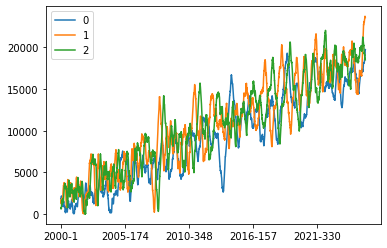

In [36]:
df2[[0,1,2]].plot()

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9497 entries, 2000-1 to 2025-365
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       9497 non-null   int64
 1   1       9497 non-null   int64
 2   2       9497 non-null   int64
 3   3       9497 non-null   int64
 4   4       9497 non-null   int64
 5   5       9497 non-null   int64
 6   6       9497 non-null   int64
 7   7       9497 non-null   int64
 8   8       9497 non-null   int64
 9   9       9497 non-null   int64
 10  10      9497 non-null   int64
 11  11      9497 non-null   int64
 12  12      9497 non-null   int64
 13  13      9497 non-null   int64
 14  14      9497 non-null   int64
 15  15      9497 non-null   int64
 16  16      9497 non-null   int64
 17  17      9497 non-null   int64
 18  18      9497 non-null   int64
 19  19      9497 non-null   int64
 20  20      9497 non-null   int64
 21  21      9497 non-null   int64
 22  22      9497 non-null   int64
 23  23      

In [0]:
df2.to_csv("/content/drive/My Drive/Google Earth/new datasets/Traffic_density_day_by_day_2000_to_2025_version2.csv",index=False)

In [39]:
df2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
count,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,...,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000,9497.000000
mean,9200.951669,10681.532905,10584.908182,9034.135727,10769.206065,10734.328314,9252.773823,9299.528799,10350.171528,10568.150784,10051.323471,9135.761188,9097.669896,9330.689481,9406.966726,9151.849531,9567.840160,9100.785722,8530.127514,10428.189112,9149.162999,10083.200379,8736.805096,10016.933663,14893.310730,11354.850163,10719.788460,10647.854270,10104.893440,8684.683690,8815.374329,14895.322523,10595.555544,8699.729599,9569.324102,10542.510372,9471.891334,9709.900916,9033.321786,12658.863641,...,8973.448247,14877.940086,9222.195957,9596.381489,10580.368011,8733.207855,9067.049805,10726.736864,9116.524481,8700.659156,12081.332947,8667.232179,9556.187428,10267.051595,10273.125619,8961.559545,14765.490365,9346.517532,8666.816258,10468.661261,10612.072760,9207.738023,9595.082763,9115.598294,10709.649995,9638.887543,9019.446773,11207.270822,8629.895757,10244.788038,8953.406234,10037.658945,10534.457092,9111.439086,10663.328841,8834.785301,9103.708645,10683.031905,8639.807939,9403.715384
std,5282.355633,5376.956689,5427.412337,5388.758185,5427.505374,4503.385962,5008.290074,5369.416821,5457.684367,5410.540761,5348.401379,5325.078089,5333.717941,5053.317347,5301.220994,5276.299345,5422.260826,5337.282587,5151.565508,5450.672397,5277.641138,5362.564876,5171.987137,5361.163080,3746.722822,4397.150884,5424.112986,5371.852432,5339.448275,4957.483541,5138.214259,3671.077110,5392.675236,5309.754331,5428.482882,5411.895170,5358.945542,5332.725168,5055.645293,4159.495342,...,5436.524695,3741.449527,5335.765544,4853.156018,5393.771075,5374.862153,5384.195943,5423.960890,5322.216963,5391.012196,4306.287978,5382.173568,5410.889077,4331.561743,5445.994112,5034.211132,3774.946753,5332.199164,5209.508712,5419.517964,5349.440626,4990.902889,5340.869169,4979.407204,5429.309243,4837.369582,5430.666709,5694.670783,5229.997469,5447.607680,5034.688853,5387.312459,5413.424847,5331.670687,5400.247591,5316.419217,5318.553967,5394.343349,5217.757904,5036.446239
min,35.000000,46.000000,12.000000,12.000000,38.000000,3602.000000,1167.000000,30.000000,5.000000,45.000000,5.000000,17.000000,33.000000,1262.000000,11.000000,2.000000,32.000000,39.000000,93.000000,30.000000,8.000000,31.000000,6.000000,20.000000,9952.000000,4585.000000,42.000000,23.000000,26.000000,38.000000,44.000000,9006.000000,21.000000,390.000000,14.000000,21.000000,3.000000,34.000000,749.000000,6680.000000,...,43.000000,9946.000000,2.000000,1849.000000,7.000000,41.000000,46.000000,34.000000,46.000000,32.000000,5718.000000,24.000000,31.000000,3115.000000,45.000000,670.000000,9929.000000,26.000000,304.000000,48.000000,45.000000,1126.000000,22.000000,958.000000,25.000000,1924.000000,25.000000,1059.000000,185.000000,12.000000,664.000000,8.000000,40.000000,45.000000,14.000000,490.000000,12.000000,32.000000,213.00

In [40]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
2000-1,1835,1563,642,2030,1799,6509,3294,1950,1376,879,1960,1006,1873,3473,1605,1053,1528,1924,872,2020,967,1904,246,1276,9965,7478,1354,1560,1617,265,107,9006,704,664,1591,833,1335,623,2054,8588,...,1563,9950,1721,4336,693,556,2025,1288,1823,319,8045,288,1474,6166,1670,2106,9929,937,420,2273,710,3149,1032,2930,1236,4500,2013,1059,794,1656,2077,1469,1220,1834,1397,535,1445,1428,710,3733
2000-2,1838,1482,619,1992,1769,6499,3266,1927,1400,857,2004,960,1821,3459,1567,1086,1559,1893,840,2030,976,1908,247,1343,9967,7478,1263,1488,1563,274,92,9009,729,645,1652,757,1381,573,2057,8587,...,1642,9952,1776,4308,707,631,1989,1392,1804,309,8039,339,1502,6155,1673,2106,9934,949,419,2243,713,3120,1035,2909,1224,4490,2018,1061,830,1622,2085,1487,1121,1825,1425,511,1342,1431,723,3731
2000-3,1849,1429,696,1956,1766,6498,3250,1907,1433,764,1953,936,1809,3442,1533,1129,1588,1887,785,2139,1014,1958,253,1344,9968,7481,1235,1408,1458,298,91,9014,732,622,1652,737,1415,543,2046,8590,...,1673,9957,1792,4286,713,705,1960,1517,1803,321,8032,335,1535,6146,1690,2087,9948,965,422,2186,746,3110,1049,2880,1234,4483,2003,1064,816,1600,2099,1563,1038,1791,1430,500,1266,1460,758,3734
2000-4,1814,1455,790,1926,1710,6490,3230,1869,1440,769,1936,866,1780,3450,1486,1174,1638,1833,715,2217,1054,2027,275,1386,9968,7477,1239,1410,1411,353,55,9017,693,604,1620,744,1418,563,2043,8590,...,1692,9956,1820,4260,679,735,1933,1613,1766,319,8033,317,1567,6136,1655,2060,9958,1009,425,2142,723,3125,1063,2838,1304,4475,2018,1066,825,1567,2096,1618,954,1834,1349,538,1177,1431,804,3748
2000-5,1835,1470,773,1898,1726,6486,3197,1781,1504,783,1874,828,1810,3440,1451,1235,1662,1807,665,2235,1071,2012,305,1455,9966,7474,1281,1442,1371,361,44,9017,666,568,1559,732,1434,573,2038,8582,...,1713,9955,1854,4231,648,787,1924,1660,1738,321,8033,294,1598,6130,1633,2040,9970,1080,458,2108,750,3118,1088,2794,1428,4474,2024,1069,856,1528,2076,1667,925,1815,1246,523,1106,1329,832,3748


In [0]:
df_to_train = df2.iloc[0:7305,:]

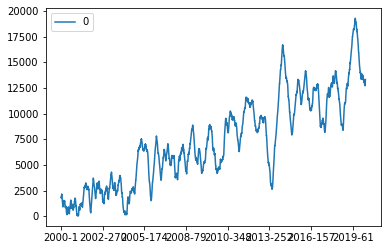

In [48]:
df_to_train[[0]].plot()

In [46]:
df_to_predict = df2.iloc[7305:,:]
df_to_predict

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
2020-1,13383,16782,15339,14144,14459,14811,16309,10445,16766,18926,14755,18877,12597,16465,15443,13217,13891,11832,12598,9388,13542,14642,14915,17198,18550,14222,18381,16786,14899,11208,15092,17792,12551,15537,13833,18488,15819,13121,12032,15205,...,11804,18943,14666,12157,12680,12428,14606,15935,13604,11841,15791,14387,14045,14846,14348,13774,18313,14630,13379,13867,9890,15806,13677,13221,17874,10832,13242,16534,6582,15380,13380,15945,18935,13233,16834,13711,16698,16917,8185,16308
2020-2,13425,16793,15366,14179,14521,14823,16305,10397,16734,18920,14811,18963,12667,16452,15359,13152,13853,11818,12620,9352,13623,14660,14908,17147,18555,14230,18402,16698,14885,11201,15103,17797,12466,15529,13851,18462,15824,13037,12043,15206,...,11746,18950,14647,12145,12585,12447,14658,15784,13659,11775,15793,14398,13939,14863,14327,13792,18322,14697,13432,13866,9834,15796,13739,13240,17870,10834,13185,16536,6583,15470,13405,15965,19080,13231,16930,13671,16746,16903,8127,16320
2020-3,13467,16768,15373,14231,14534,14837,16299,10350,16668,18795,14776,19004,12751,16430,15303,13110,13901,11783,12646,9364,13674,14591,14948,17084,18560,14239,18371,16671,14870,11202,15114,17804,12397,15526,13856,18428,15866,12940,12059,15219,...,11689,18952,14629,12130,12481,12468,14735,15750,13756,11766,15796,14388,13863,14868,14300,13814,18328,14720,13471,13833,9800,15786,13769,13273,17776,10834,13133,16538,6585,15551,13431,15995,19180,13218,17054,13655,16801,16903,8097,16313
2020-4,13545,16729,15344,14260,14554,14846,16288,10354,16569,18692,14703,19017,12832,16397,15255,13104,13860,11799,12685,9372,13708,14551,14982,17117,18563,14253,18372,16695,14829,11213,15133,17811,12329,15551,13876,18440,15868,12845,12083,15231,...,11631,18957,14596,12105,12396,12490,14791,15673,13899,11753,15805,14405,13817,14881,14299,13840,18336,14786,13478,13832,9799,15776,13836,13314,17650,10848,13108,16540,6618,15625,13448,16087,19208,13203,17108,13675,16846,16926,8089,16332
2020-5,13597,16809,15368,14255,14613,14852,16282,10351,16458,18599,14643,19052,12878,16384,15233,13066,13838,11823,12737,9332,13721,14462,15017,17165,18567,14272,18363,16745,14777,11215,15167,17816,12337,15548,13869,18370,15870,12757,12098,15242,...,11589,18965,14529,12081,12335,12491,14811,15585,13963,11748,15813,14409,13809,14894,14276,13866,18345,14813,13458,13812,9819,15786,13837,13352,17513,10861,13106,16542,6611,15685,13474,16149,19327,13179,17122,13680,16848,16957,8049,16340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-361,19544,23628,18679,15140,21178,19588,15752,17971,18745,20219,16016,18822,16922,17919,19189,18216,20524,17455,14693,19177,17225,15814,16352,20901,21216,18949,21087,23666,20757,12491,23158,21681,14957,16378,18919,20180,22674,21446,16537,19207,...,18864,21725,20870,19362,15016,17119,15805,17669,16511,17018,20936,19979,21132,15646,18959,17299,21659,14859,16896,16575,17216,16165,13627,16364,20619,17155,17344,20874,18466,19635,17268,19964,19111,17067,23135,17960,18021,23281,17883,19530
2025-362,19600,23623,18591,15120,21141,19589,15736,17961,18738,20184,16090,18790,16920,17908,19213,18208,20406,17409,14746,19225,17206,15828,16361,20991,21220,18941,21038,23722,20782,12516,23110,21675,14894,16392,18879,20137,22661,21490,16523,19195,...,18835,21725,20794,19386,14972,17171,15880,17705,16498,17066,20942,19888,21098,15673,19004,17305,21658,14873,16908,16569,17302,16203,13677,16412,20508,17159,17339,20876,18449,19563,17272,19958,19012,17040,23179,17945,18042,23307,17915,19536
2025-363,19681,2

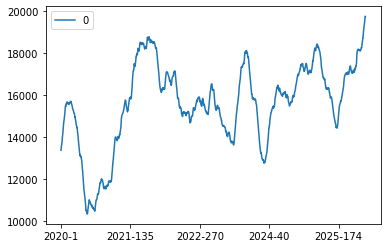

In [49]:
df_to_predict[[0]].plot()

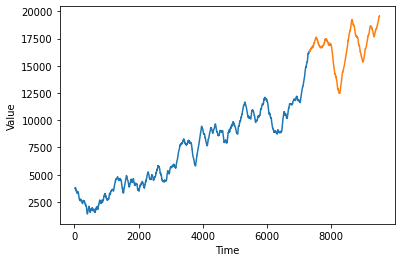

In [59]:
plot_series(time[0:7305],df_to_train.iloc[:,99])
plot_series(time[7305:],df_to_predict.iloc[:,99])


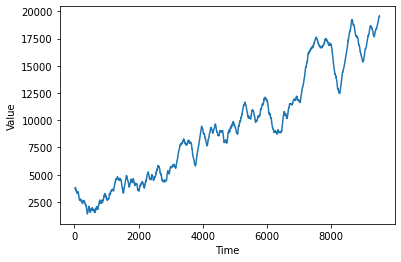

In [58]:
plot_series(time,df2.iloc[:,99])

In [0]:
df_to_train.to_csv("/content/drive/My Drive/Google Earth/new datasets/Traffic_density_day_by_day_2000_to_2019.csv",index=False)

In [0]:
df_to_predict.to_csv("/content/drive/My Drive/Google Earth/new datasets/Traffic_density_day_by_day_2020_to_2025.csv",index=False)

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
